In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [7]:
iris = load_iris(as_frame=True)
iris
df = iris.frame
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
11,4.8,3.4,1.6,0.2,0
134,6.1,2.6,5.6,1.4,2
31,5.4,3.4,1.5,0.4,0
75,6.6,3.0,4.4,1.4,1
94,5.6,2.7,4.2,1.3,1
119,6.0,2.2,5.0,1.5,2
80,5.5,2.4,3.8,1.1,1
130,7.4,2.8,6.1,1.9,2
88,5.6,3.0,4.1,1.3,1
6,4.6,3.4,1.4,0.3,0


In [8]:
df.target.unique()

array([0, 1, 2])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df["target_name"] = df.target.map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [16]:
df.shape

(150, 6)

In [ ]:
print(iris.DESCR)

In [13]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

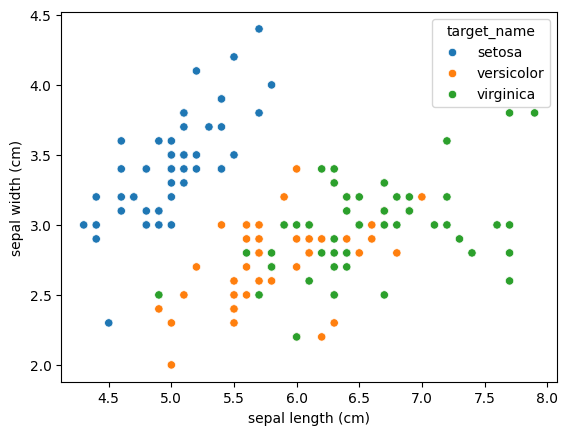

In [17]:
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

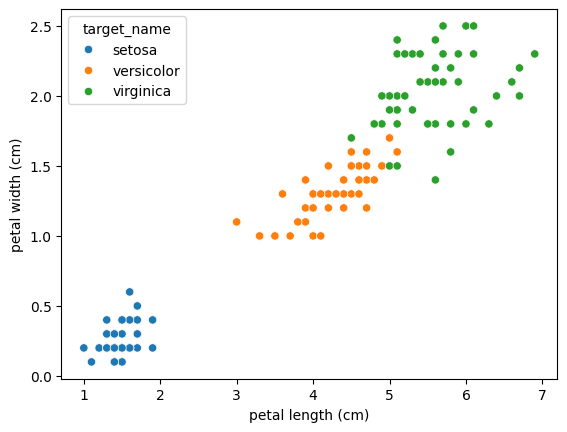

In [18]:
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_name")

In [19]:
X = df[
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
]
y = df["target"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [26]:
model.score(X_test, y_test)

0.9777777777777777

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9777777777777777

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.94      0.97        16
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

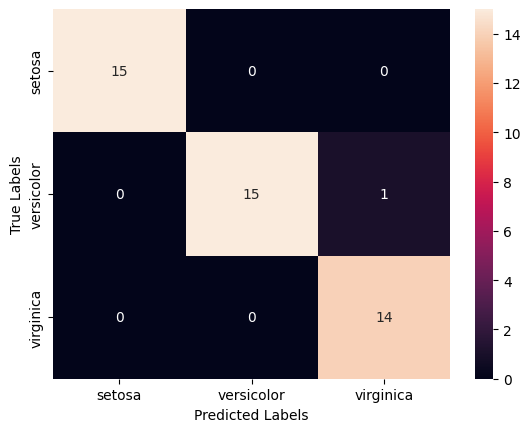

In [35]:
sns.heatmap(
    cm, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()